#### Student ID: 18200036
#### Name: Brian Parle

Task 1

Load bank-et1.csv into a Pandas dataframe. 
Examine the first few data rows and the last few data rows. 
Identify an attribute that can be the target/dependable variable for 2-class classification. Follow the examples in the provided notebook “Lab 1 - Exploratory Data Analysis. ipynb ” (see section Material, Resources and Online Meetings below).

Task 2

Follow the examples in the provided notebook “Lab 1 - Exploratory Data Analysis. ipynb ” (see section Material, Resources and Online Meetings below) to perform EDA of the bank data set.

- Calculate statistics for the numerical and categorical attributes.
- Use at least two different plotting techniques to plot the distribution of two numerical and two categorical attributes. Draw short conclusions (in a markdown cell).
- Generate two plots with the combined distribution of attributes and draw conclusions from them (in a markdown cell).
- Generate additional plots to identify two numerical attributes that can potentially be used for predicting the value of the dependent variable you chose in Task 1. You won't find two numerical attributes that will perfectly classify a dependent variable. Pick the best you can find.

Task 3

Consider the two numerical attributes picked in Task 2 and describe (in a markdown cell) how a perceptron can be used to perform 2-class classification. Use the following terms in your description:
- Input space
- Output space
- Unknown target function
- Data set
- Hypothesis set
- Final Hypothesis
- In-sample error
- Out-of-sample error

Task 4 (Look at Exercise1_10)

Run the provided perceptron learning algorithm (PLA) on the dataset provided in the notebook. Take note of the number of iterations that were required to come to the final hypothesis and the final error. Once you are satisfied you understand these results, run the PLA algorithm on the dataset you have explored in the previous tasks (using the selected dependent variable and the two most promising numerical attributes/features). If results are unsatisfactory (if you don't get results at all, why would this be?), investigate how the PLA algorithm can be changed to improve the performance. Change the provided algorithm accordingly and plot estimates for P[Ein-Eout|>e]. Exercise 1.10 (see Python code below in the Resources section) gives an example of how you can create such plots. In the same plot add the Hoeffding Bound  and conclude whether or not the found results obey the Hoeffding Equation (in a markdown cell). Draw conclusions on whether or not you have found proof that learning is possible (in a markdown cell).

HINT: The videos discuss the 'Pocket' algorithm as an improvement on the PLA.

Post (by Saturday Week 1)
Git push your notebook to the repository for E-tivity 1 and submit a post to the forum for E-tivity 1 with the following content:

The names of the target variable you have chosen in Task 1 and the two numerical attributes you have chosen in Task 2. Your classification description required in Task 3.
Summary (max 200 words) of the most interesting discoveries in the data set as result of performing EDA in Task 2.
A link to your code in GitLab.

In [111]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle

Suggestion: try PLA on this dataset before using the bank dataset

In [2]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2)
y = [yy if yy == 1 else -1 for yy in y] 

In [3]:
def h(x,w):
    #Perceptron model: the sign of the dot product of weights and input vector determines the class allocation
    bias = np.array([1])
    return np.sign(w.T.dot(np.concatenate((bias,x))))

In [4]:
def point_on_boundary(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

In [6]:
def decision_boundary(weights, x_min, x_max):
    # Return two points on the decision boundary
    return [point_on_boundary(weights, x_min), point_on_boundary(weights, x_max)]

In [51]:
def pla(training_in, training_out, weights):
    bias = np.array([1])
    iterations=0
    while True:
        errors = 0;
        for x,y in zip(training_in, training_out):
            if (h(x,weights)!=y):
                iterations+=1;
                weights = weights + y*(np.concatenate((bias,x)))
                errors+=1;
        if (errors == 0):
            break
    return weights, iterations

In [52]:
def pla_max_iterations(training_in, training_out, weights, max_iterations):
    """
    Updated version of PLA to run for a maximum number of iterations
    """
    bias = np.array([1])
    iterations=0
    while True:
        errors = 0;
        for x,y in zip(training_in, training_out):
            if (h(x,weights)!=y):
                iterations+=1;
                weights = weights + y*(np.concatenate((bias,x)))
                errors+=1;
        if (errors == 0) or (iterations >= max_iterations):
            break
    return weights, iterations

In [100]:
def pla_pocket(training_in, training_out, weights, max_iterations):
    """
    Updated version of PLA to run for a maximum number of iterations, and use pocket algorithm
    """
    bias = np.array([1])
    iterations=0
    #put the initial weights and erro rinto our 'pocket'
    pocket_weights = weights
    pocket_iterations=0
    pocket_error = calc_error(training_in, training_out, weights)
    while iterations < max_iterations:
        errors = 0;
        for x,y in zip(training_in, training_out):
            if (h(x,weights)!=y):
                err = calc_error(training_in, training_out, weights)
                if (err < pocket_error):
                    pocket_error = err
                    pocket_weights = weights
                    pocket_iterations = iterations
                iterations+=1;
                weights = weights + y*(np.concatenate((bias,x)))
                errors+=1;
        if (errors == 0):
            break
    return pocket_weights, pocket_iterations

In [53]:
def calc_error(training_in, training_out, weights):
    # Calculate the classification error as the fraction of training samples that are misclassified
    errors=0
    for x,y in zip(training_in, training_out):
        if (h(x,weights)!=y):
            errors+=1;
    return errors/len(training_in)

In [54]:
print(X.shape)
print(len(y))

(1000, 2)
1000


In [55]:
#use PLA with generated dataset
random_generator = np.random.RandomState(34)
_, x_columns = X.shape
x_columns = x_columns+1 #add element 0 to hold bias
#Initialize all weights to 0 or a small random number  
pla_weights = random_generator.normal(loc=0.0, scale=0.001, size=x_columns)

out_weights, out_iterations = pla(X, y, pla_weights)
print(out_weights)
print(calc_error(X, y, out_weights))
print(out_iterations)

[ 0.00024384 -0.00074732 -0.00156118]
0.0
0


In [56]:
#check the decision boundary
db1, db2 = decision_boundary(out_weights, -10, 10)

print(db1)
print(db2)

4.943076244899945
-4.630702822189383


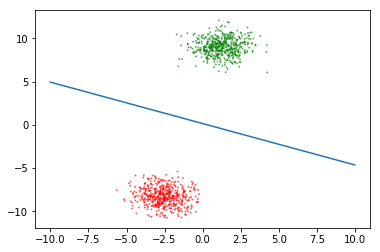

In [57]:
# plot with a scatter of the input and output spaces
map_colour = lambda x: 'red' if x==1 else 'green'
myplt_colour=[]
for item in y:
   myplt_colour.append(map_colour(item))
_, myplt = plt.subplots()
myplt.set_title('')
myplt.plot([-10,10],[db1,db2])
myplt.scatter(X[:,0], X[:,1], c=myplt_colour, s=1, alpha=0.5)

### Task 1

In [58]:
#Load Bank dataset
df_bank = pd.read_csv('bank_et1.csv')

In [59]:
# Print first 5 rows of the dataframe
df_bank.head(5)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0,32,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,1,39,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,2,59,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,3,47,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,4,54,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [60]:
# Print last 5 rows of the dataframe
df_bank.tail(5)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,1995,20,student,single,NaN,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,1996,28,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,1997,81,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,1998,46,services,married,primary,no,4343,-0.965874,0.302708,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,1999,40,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


Looking at the summary data, there seems to be a couple of candidates for a 2-Class Classification including:
- housing (yes/no) - can be converted to a 0/1 value - this could indicate that the customer holds a mortgage
- loan (yes/no) - this could indicate whether the customer already has a loan or not
- poutcome - seems to be either failure or Null
- subscriber (yes/no) - this couldindicate whether the customer subscribed

The best option for dependent variable is **subscriber**, indicating whether a customer subscribed for an offer.

### Task 2

In [61]:
#Print summary
df_bank.describe()

,Unnamed: 0,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,41.751500,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,577.494589,12.723077,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,0.000000,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,499.750000,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,999.500000,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,1499.250000,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,1999.000000,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


In [62]:
# For the non-numerical categorical values we can look at the value counts
df_bank['housing'].value_counts()

no     1037
yes     963
Name: housing, dtype: int64

In [63]:
df_bank['loan'].value_counts()

no     1750
yes     250
Name: loan, dtype: int64

In [64]:
df_bank['poutcome'].value_counts()

failure    955
success    444
other      147
Name: poutcome, dtype: int64

In [65]:
df_bank['subscribed'].value_counts()

no     1000
yes    1000
Name: subscribed, dtype: int64

Text(0,0.5,'Count')

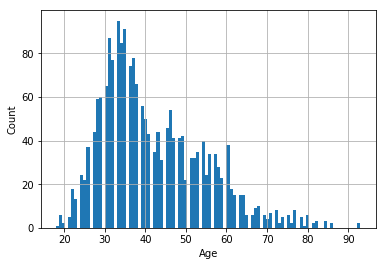

In [66]:
#Numerical Plot 1
#Plot distribution of numerical attribute 'age'
df_bank['age'].hist(bins=100)
plt.xlabel('Age')
plt.ylabel('Count')

Based on the Age plot, it seems that we have discrete numbers of samples in certain age brackets, rather than a continuous distribution,which is what you would expect. 

Text(0,0.5,'Count')

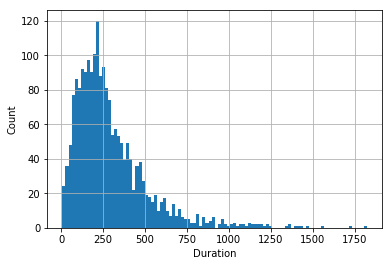

In [67]:
#Numerical Plot 2
#Plot distribution of numerical attribute 'duration'
df_bank['duration'].hist(bins=100)
plt.xlabel('Duration')
plt.ylabel('Count')

The duration distribution reflects the summary data where te 50% quartile is 236 with a long tail of larger values.

Text(0,0.5,'Count')

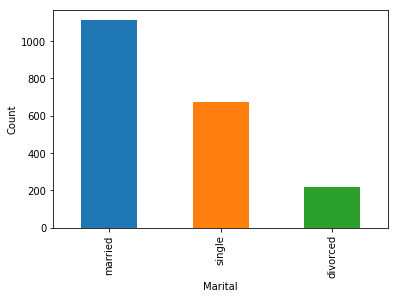

In [68]:
#Categorical Plot 1
df_bank['marital'].value_counts().plot(kind='bar')
plt.xlabel('Marital')
plt.ylabel('Count')

Most customers are married, the least common are divorced.

Text(0,0.5,'Count')

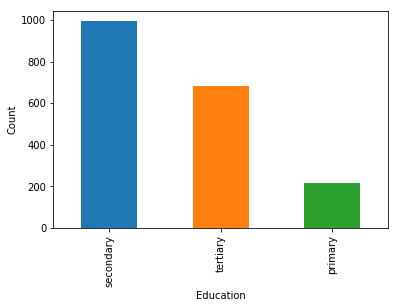

In [69]:
#Categorical Plot 2
df_bank['education'].value_counts().plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('Count')

Text(0.5,1,'Boxplot of Balance by Marital')

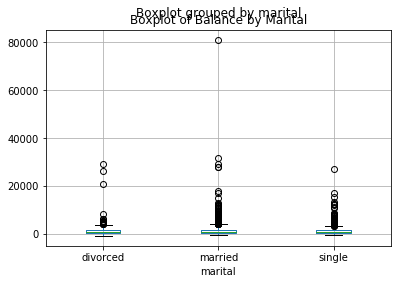

In [70]:
#Combined data plot 1
#Plot some combined data. Let's look at balance distribution by marital
df_bank.boxplot(column='balance', by='marital')
plt.title('Boxplot of Balance by Marital')

The boxplot indicates there a lot of zero balances skewing the distribution

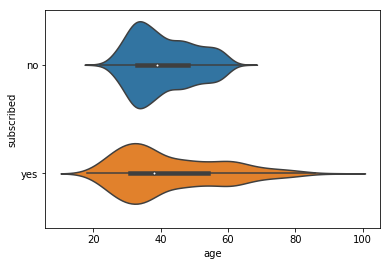

In [136]:
#Combined data plot 2
#Seaborn violin plot of age distribution by subscribed
sns.violinplot(x='age', y='subscribed', data=df_bank)

In this violin plot, we can see that there is a small difference in the age profile of subscribers and non-subscribers. People over 65 seem likely to subscribe.

Text(0.5,1,'Loan-to-Income v Balance-to-Loan')

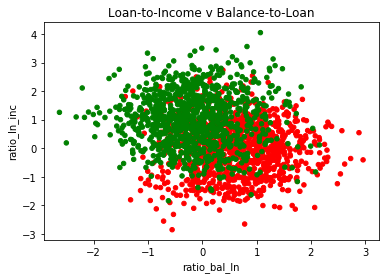

In [72]:
#Look for a set of numericsal values that can be used to approximate for dependent variable
#Plot a scatter chart of 'ratio_bal_ln' versus 'ratio_ln_inc'

#Let's colour the **subscriber** value for each of the plots to see if we can see a 2-class classification.

map_colour = lambda x: 'red' if x=='no' else 'green'
myplt_colour=[]
for item in df_bank['subscribed']:
   myplt_colour.append(map_colour(item))
df_bank.plot.scatter(x='ratio_bal_ln', y='ratio_ln_inc',c=myplt_colour)
plt.title('Loan-to-Income v Balance-to-Loan')

This chart gives as a reasonable good approximation to two distinct classes along the ratio_ln_inc dimension, so is a good candidate for our perceptron algorithm. Let's expore some other feature relationships.

Text(0.5,1,'Loan-to-Income v Campaign')

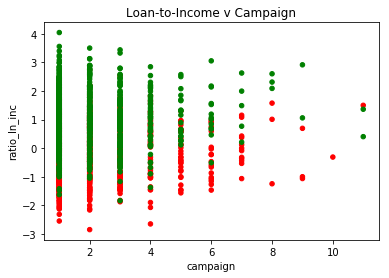

In [73]:
df_bank.plot.scatter(x='campaign', y='ratio_ln_inc',c=myplt_colour)
plt.title('Loan-to-Income v Campaign')

Text(0.5,1,'Loan-to-Income v Age')

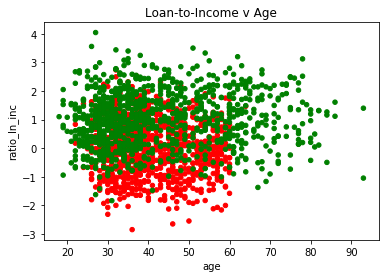

In [74]:
df_bank.plot.scatter(x='age', y='ratio_ln_inc',c=myplt_colour)
plt.title('Loan-to-Income v Age')

Text(0.5,1,'Loan-to-Income v Previous')

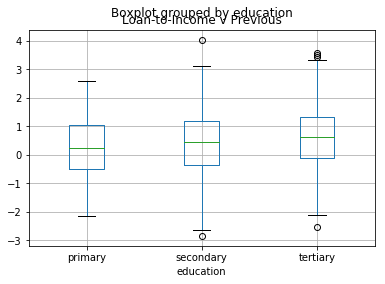

In [75]:
#age, balance, ratio_bal_ln, ratio_ln_inc, day, duration, campaign, pdays, previous
df_bank.boxplot(by='education', column='ratio_ln_inc')
plt.title('Loan-to-Income v Previous')

Text(0.5,1,'Balance-To-Loan v Age')

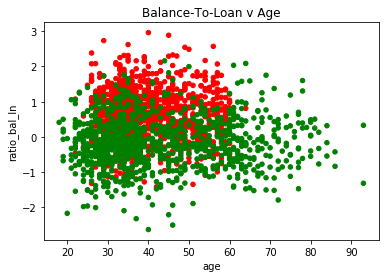

In [76]:
#age, balance, ratio_bal_ln, ratio_ln_inc, day, duration, campaign, pdays, previous
df_bank.plot.scatter(x='age', y='ratio_bal_ln',c=myplt_colour)
plt.title('Balance-To-Loan v Age')

Of the additional plots generated the 2 best options seem to be **Balance-To-Loan v Age** and **Loan-to-Income v Balance-to-Loan**

The two variables I will use are: **Loan-to-Income (ratio_ln_inc)** and **Balance-to-Loan (ratio_bal_ln)**

### Task 3

Consider the two numerical attributes picked in Task 2 and describe (in a markdown cell) how a perceptron can be used to perform 2-class classification. Use the following terms in your description:
- Input space
- Output space
- Unknown target function
- Data set
- Hypothesis set
- Final Hypothesis
- In-sample error
- Out-of-sample error

The perceptron algorithm aims to identify an unknown target function which, when given a set of inputs, correctly classifies the values. The input space of data values is mapped to the output space of classes by the function. In order to find the unknown function, the perceptron algorithm uses a set of weights to apply to the data samples and calculates an output that attempts to match the expected output. The full set of possible functions is the Hypothesis set. Each iteration of the perceptron algorithm nudges the weights and tests a different hypothesis function. Each nudge brings us nearer the target function. The best hypothesis function becomes the Final Hypothesis and this happens when the error between predicted and actual output converges to zero. The sample data may not represent the input space accurately and this is the in-sample error. The error between any hypothesis and the target function is the out-of-sample error. If there is not a clear two-class classification, then the out-of-sample error may not converge to zero.

### Task 4

Run the provided perceptron learning algorithm (PLA) on the dataset provided in the notebook. Take note of the number of iterations that were required to come to the final hypothesis and the final error. Once you are satisfied you understand these results, run the PLA algorithm on the dataset you have explored in the previous tasks (using the selected dependent variable and the two most promising numerical attributes/features). If results are unsatisfactory (if you don't get results at all, why would this be?), investigate how the PLA algorithm can be changed to improve the performance. Change the provided algorithm accordingly and plot estimates for P[Ein-Eout|>e]. Exercise 1.10 (see Python code below in the Resources section) gives an example of how you can create such plots. In the same plot add the Hoeffding Bound  and conclude whether or not the found results obey the Hoeffding Equation (in a markdown cell). Draw conclusions on whether or not you have found proof that learning is possible (in a markdown cell).



In [77]:
#create the input space by extracting the 2 features we are going to use
X_bank = df_bank[['ratio_ln_inc','ratio_bal_ln']].values

#create output space by extracting the categorical column and converting to numeric
y_temp = pd.get_dummies(df_bank['subscribed'])
y_bank = list(y_temp['yes'])

#map y to a -1,1 output space, so map zero's to -1
y_bank_mapped = [yy if yy == 1 else -1 for yy in y_bank] 

print(X_bank.shape)
print(len(y_bank_mapped))

(2000, 2)
2000


In [84]:
#run PLA on this data
random_generator = np.random.RandomState(42)
_, x_columns = X_bank.shape
x_columns = x_columns +1 #add element 0 to hold bias
#Initialize all weights to 0 or a small random number  
pla_bank_weights = random_generator.normal(loc=0.0, scale=0.01, size=x_columns)

#Uncomment the next line to run the PLA
#out_weights, out_iterations = pla(X_bank, y_bank_mapped, pla_bank_weights)
#print(calc_error(X_bank, y_bank_mapped, out_weights))
#print(out_iterations)



#### PLA Observations
Without any changes, the origional PLA algorithm takes a very long time to run. This is due to the (errors == 0) condition which is the only way the loop will break. This will only happen in the case where the input space is linearly separable.

I have modified the algorithm to:
- run on a subset of the data picked using train_test_split
- this alsy randomizes the data
- run for a specified maximum number of iterations and examine the output below

In [97]:
#Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_bank, y_bank_mapped, test_size=0.7, random_state=39)

out_weights, out_iterations = pla_max_iterations(X_train, y_train, pla_bank_weights, 100000)

print(calc_error(X_train, y_train, out_weights))
print(out_iterations)
print(out_weights)

0.21166666666666667
100062
[ 0.00496714  1.17122274 -2.35033281]


-2.489497032321578
2.4937237882148784


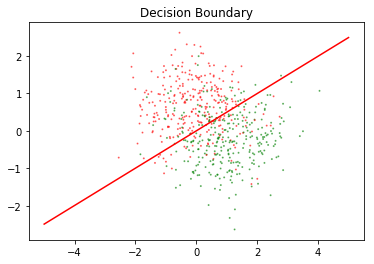

In [98]:
#check the decision boundary
bank_db1, bank_db2 = decision_boundary(out_weights, -5, 5)

print(bank_db1)
print(bank_db2)
# plot with a scatter of the input and output spaces
map_colour = lambda x: 'red' if x==-1 else 'green'
myplt_colour=[]
for item in y_train:
   myplt_colour.append(map_colour(item))
_, myplt = plt.subplots()
myplt.set_title('Decision Boundary')
myplt.plot([-5,5],[bank_db1,bank_db2],'red')
myplt.scatter(X_train[:,0], X_train[:,1], c=myplt_colour, s=1, alpha=0.5)

The calc_error shows a 21.16% erorr rate - this compares with a 45% error rate in my first unchanged runs. The classification is pretty good, as we can see from the graph, but there is a large overlap of the two classess, making classification using a linear method subject to error.

### Pocket algorithm
We can improve the algorithm by using the pocket algorithm to pick the best target function that produces the smallest error.

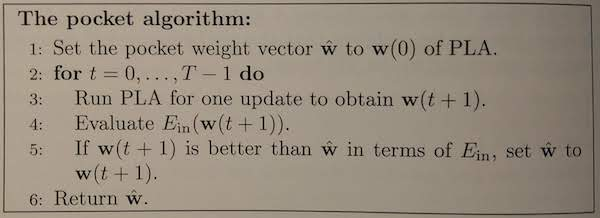
(Learning From Data (p80), Yaser S. Abu-Mostafa, Malik Magdon-Ismail, Hsuan-Tien Lin

In [106]:
out_weights, out_iterations = pla_pocket(X_train, y_train, pla_bank_weights, 100000)

In-sample error: 0.19666666666666666
702
[ 0.00496714  0.36701482 -0.43715943]


In [108]:
print('In-sample error:', calc_error(X_train, y_train, out_weights))
print('Out-of-sample error:', calc_error(X_test, y_test, out_weights))
print(out_iterations)
print(out_weights)

In-sample error: 0.19666666666666666
Out-of-sample error: 0.22642857142857142
702
[ 0.00496714  0.36701482 -0.43715943]


-2.5072713732938725
2.5299959959975067


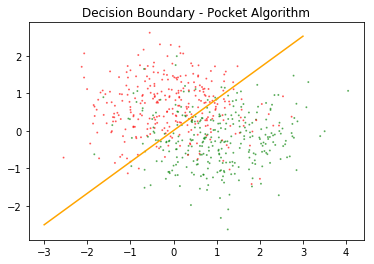

In [105]:
#check the decision boundary
pocket_db1, pocket_db2 = decision_boundary(out_weights, -3, 3)

print(pocket_db1)
print(pocket_db2)
# plot with a scatter of the input and output spaces
map_colour = lambda x: 'red' if x==-1 else 'green'
myplt_colour=[]
for item in y_train:
   myplt_colour.append(map_colour(item))
_, myplt = plt.subplots()
myplt.set_title('Decision Boundary - Pocket Algorithm')
myplt.plot([-3,3],[pocket_db1,pocket_db2], 'orange')
myplt.scatter(X_train[:,0], X_train[:,1], c=myplt_colour, s=1, alpha=0.5)

With the pocket algorithm, we have an improved final target function with a 19.66% error.

#### Calculate P[|Ein - Eout| > epsilon]

In order to produce this plot we must run multiple experiments to calculate a set of Eins and Eouts. We can then calculate, for each epsilon, how many times |Ein - Eout| exceeds epsilon.

We will run this experiment M times

In [115]:
M = 10

In [116]:
Ein = []
Eout = []
for i in range(M):
    #select a random training and test set
    X_train, X_test, y_train, y_test = train_test_split(X_bank, y_bank_mapped, test_size=0.3, random_state=39)

    #Initialize all weights to 0 or a small random number  
    pla_bank_weights = random_generator.normal(loc=0.0, scale=0.01, size=x_columns)
    
    #run the pocket algorithm
    out_weights = []
    out_iterations = 0
    out_weights, out_iterations = pla_pocket(X_train, y_train, pla_bank_weights, 10000)

    #store Ein (in-sample error)
    Ein.append(calc_error(X_train, y_train, out_weights))

    #store Eout (out-of-sample error)
    Eout.append(calc_error(X_test, y_test, out_weights))
    
    print('Experiments completed: ', i+1)

Experiments completed:  1
Experiments completed:  2
Experiments completed:  3
Experiments completed:  4
Experiments completed:  5
Experiments completed:  6
Experiments completed:  7
Experiments completed:  8
Experiments completed:  9
Experiments completed:  10


In [117]:
print(Ein)
print(Eout)

[0.18666666666666668, 0.18666666666666668, 0.18666666666666668, 0.18666666666666668, 0.18666666666666668, 0.18666666666666668, 0.18666666666666668, 0.18666666666666668, 0.18666666666666668, 0.18666666666666668]
[0.23214285714285715, 0.23214285714285715, 0.23357142857142857, 0.2342857142857143, 0.23357142857142857, 0.2342857142857143, 0.23285714285714285, 0.23357142857142857, 0.23357142857142857, 0.23285714285714285]


Ein seems to have settled on 0.1866 which suggests that the pocket algorithm returns similar weights for each experiment.

Eout also seems to be consistenly around 0.23 which indicates a final hypothesis much better than random (for which you would expect error 0.5 in a 2-class classification).

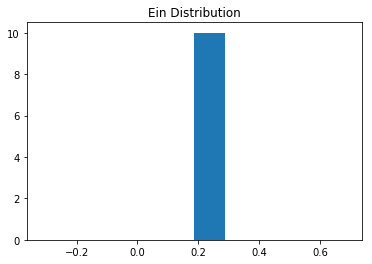

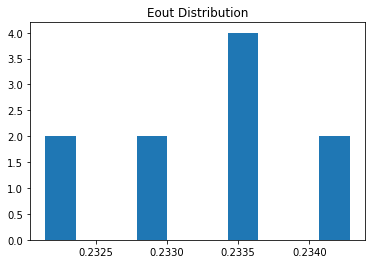

In [118]:
#Examine the Ein and Eout values

plt.hist(Ein)
plt.title('Ein Distribution')
plt.show()
plt.hist(Eout)
plt.title('Eout Distribution')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

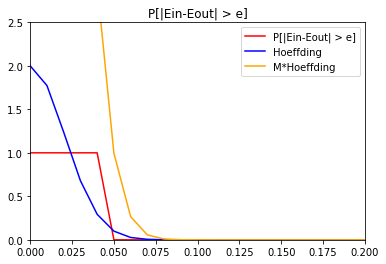

In [139]:
# Plot the proability abs(Ein-Eout) > e, also plot Hoeffding Inequality and the modified Hoeffding bound for M samples

prob_epsilon=[]
epsilons = np.arange(0, 1, 0.01)
for e in epsilons:
    prob_epsilon.append(len([1 for i in range(len(Ein)) if abs(Ein[i] - Eout[i]) > e])/len(Ein))

plt.figure()
plt.plot(epsilons, prob_epsilon, color='r', label = 'P[|Ein-Eout| > e]')
plt.plot(epsilons, [2*math.exp(-2*e**2*len(X_train)) for e in epsilons], color='b', label='Hoeffding')
plt.plot(epsilons, [M*2*math.exp(-2*e**2*len(X_train)) for e in epsilons], color='orange', label='M*Hoeffding')
plt.title('P[|Ein-Eout| > e]')
#set the axes min and max to allow us zoom in on the area of interest
plt.ylim(top=2.5, bottom=0)
plt.xlim(right=0.2, left=0)
plt.legend()
plt.show

The Hoeffding Inequality is in blue above. As we can see, our model is not bounded by Hoeffding. The modified Hoeffding is a safer bound and our hypothesis set does not exceed it.

My understanding of whether there is the possibility of learning is whether we can produce a final hypothesis for which the out-of-sample error approximates the in-sample error, and the in-sample error approximates zero. Hoeffding helps us bound this and the experiment above suggests that with PLA there is not the prospect of learning.